In [286]:
#Tesla stock data

In [287]:
import pandas as pd

In [288]:
tesla_data=pd.read_csv('TSLA.csv')

In [289]:
tesla_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [290]:
#tesla revenue data

In [291]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [292]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests 

In [293]:

tesla_revenue = requests.get(url).text

In [294]:
soup = BeautifulSoup(tesla_revenue,"html.parser")

In [295]:
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
Tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        Tesla_revenue = Tesla_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [296]:
Tesla_revenue = Tesla_revenue[Tesla_revenue['Revenue'] != ""]
Tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [297]:
#gme stock data

In [298]:

import pandas as pd

In [299]:
gme=pd.read_csv('GME_stock.csv')

In [300]:
gme.head()

,date,open_price,high_price,low_price,close_price,volume,adjclose_price
0,2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
1,2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2,2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
3,2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
4,2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002


In [302]:
#gme revenue data

In [303]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [304]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests

In [305]:
gme_revenue = requests.get(url).text

In [306]:
soup = BeautifulSoup(gme_revenue,"html.parser")

In [307]:
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)

In [308]:
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [310]:
#tesla stock price graph

In [311]:

import pandas as pd

In [312]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [313]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [314]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [315]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [316]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [317]:
tesla_data=pd.read_csv('TSLA.csv')

tesla_data.reset_index(inplace=True)

In [318]:
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data.sort_values('Date')

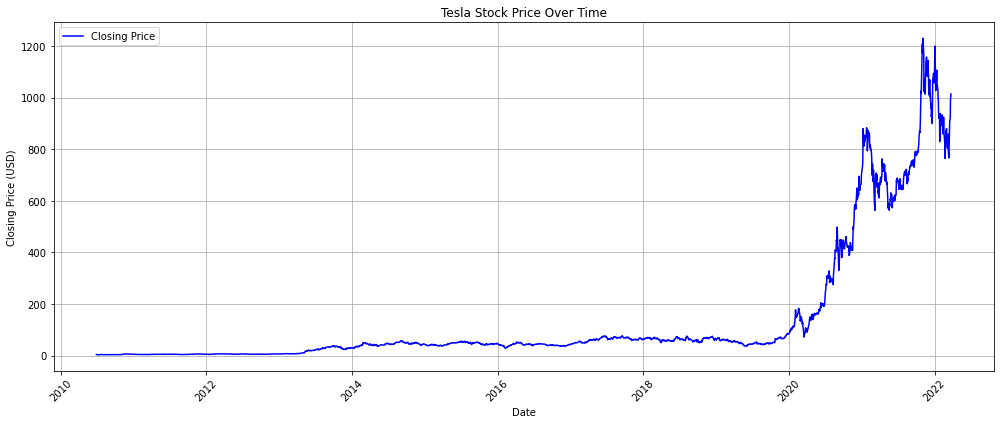

In [319]:
make_graph(tesla_data, 'Tesla Stock Price Over Time')

In [321]:
#gme stock and revenue graph

In [322]:
import pandas as pd

In [323]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [324]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [325]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [326]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

In [327]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(14, 6))
    plt.plot(data['Date'], data['Close'], label='Closing Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [328]:
gme_data=pd.read_csv('GME_stock.csv')





In [329]:
gme_data = pd.DataFrame(columns=["Date"])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data.sort_values('Date')

In [330]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

In [331]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests

In [332]:
gme_revenue = requests.get(url).text

In [333]:
soup = BeautifulSoup(gme_revenue,"html.parser")

In [334]:
tables = soup.find_all('table')
for index,table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        Date = col[0].text
        Revenue = col[1].text.replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":Date, "Revenue":Revenue}, ignore_index=True)
        #gme_revenue = pd.DataFrame(rows)
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"])
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

In [335]:
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [336]:
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], 'b-', label='Stock Price')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price (USD)', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(f"{stock} Stock Price and Revenue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], 'r-', label='Revenue')
    ax2.set_ylabel('Revenue (USD)', color='r')
    ax2.tick_params('y', colors='r')

    fig.tight_layout()
    plt.show()

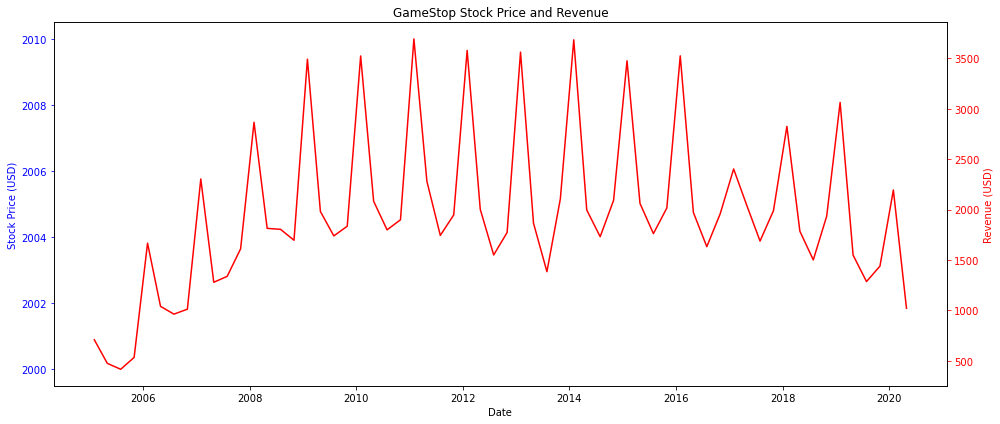

In [337]:
make_graph(gme_data, gme_revenue, 'GameStop')